# === A) Calculation: DDG_Binding ===

## 'Mutation' copy to 'mutation

In [26]:
import pandas as pd

file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
sheet = 'Sheet1'  # Change if needed

def process_and_sanity_check(file_path, sheet):
    # Try-except for full process status
    try:
        # Read the Excel sheet
        df = pd.read_excel(file_path, sheet_name=sheet)
        
        # Copy 'Mutation' to new 'mutation' column (do not modify original)
        df['mutation'] = df['Mutation']
        
        # Sanity check: Are these columns identical (except the name)?
        if df['Mutation'].equals(df['mutation']):
            print("Sanity check: 'Mutation' and 'mutation' columns are identical.")
            executed = True
        else:
            print("Sanity check failed: Columns are not identical!")
            executed = False
        
        # Save back to the same file and same sheet (replace the sheet only)
        with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
            df.to_excel(writer, sheet_name=sheet, index=False)
        
        if executed:
            print("Process executed: The 'mutation' column was added and file updated successfully.")
        else:
            print("Process NOT executed successfully due to sanity check failure.")
    except Exception as e:
        print(f"Process failed: {e}")

# Run the process and sanity check
process_and_sanity_check(file_path, sheet)

Sanity check: 'Mutation' and 'mutation' columns are identical.
Process executed: The 'mutation' column was added and file updated successfully.


# 03 SAAMBE-3D STR

## 3.1 load data

In [8]:
import pandas as pd
from IPython.display import display

# Define the file path
file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame in an IPython/Jupyter environment
display(df)

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,gnomAD Allele Frequency,Mutation,wild,position,mutant
0,ENSP00000369325.3:p.Ile3Phe,CDKL5,I3F,Healthy,NaN,NaN,NaN,X,18507103.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000009,I3F,I,3,F
1,ENSP00000369325.3:p.Asn5Asp,CDKL5,N5D,Healthy,NaN,NaN,NaN,X,18507109.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000003,N5D,N,5,D
2,NM_001323289.2(CDKL5):c.38T>C (p.Phe13Ser),CDKL5,F13S,CDKL5 disorder,VCV000929426,X,18525254.0,X,18507134.0,929426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,F13S,F,13,S
3,NM_001323289.2(CDKL5):c.59G>T (p.Gly20Val),CDKL5,G20V,CDKL5 disorder,VCV000918032,X,18525275.0,X,18507155.0,918032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,G20V,G,20,V
4,NM_001323289.2(CDKL5):c.59G>A (p.Gly20Asp),CDKL5,G20D,CDKL5 disorder|Angelman syndrome-like|Developm...,VCV000189548,X,18525275.0,X,18507155.0,189548.0,...,NaN,NaN,NaN,NaN,NaN,NaN,G20D,G,20,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NM_001323289.2(CDKL5):c.2546C>T (p.Ser849Leu),CDKL5,S849L,CDKL5 disorder,VCV000422765,X,18646540.0,X,18628420.0,422765.0,...,NaN,NaN,NaN,NaN,NaN,0.000007,S849L,S,849,L
152,NM_001323289.2(CDKL5):c.2555C>T (p.Pro852Leu),CDKL5,P852L,CDKL5 disorder,VCV000156690,X,18646549.0,X,18628429.0,156690.0,...,NaN,NaN,NaN,NaN,NaN,0.000025,P852L,P,852,L
153,NM_001323289.2(CDKL5):c.2572C>T (p.Arg858Cys),CDKL5,R858C,not provided|CDKL5 disorder|Angelman syndrome-...,VCV000426292,X,18646566.0,X,18628446.0,426292.0,...,NaN,NaN,NaN,NaN,NaN,0.000026,R858C,R,858,C
154,ENSP00000369325.3:p.Arg890Gln,CDKL5,R890Q,Healthy,NaN,NaN,NaN,X,18628543.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000002,R890Q,R,890,Q


## 3.2 Install saambe-3d on palmetto

In [ ]:
# this code runs on plmetto
ssh shamrap@slogin.palmetto.clemson.edu
salloc --nodes=1 --ntasks=1 --cpus-per-task=32 --mem=64G --time=8:00:00 

module load anaconda3/2023.09-0
source activate

source activate /project/ealexov/compbio/software/py37_webservers
cd /project/ealexov/compbio/shamrat/250415_binding/250416_saambe3d

scp -r /project/ealexov/compbio/OurTools4LocalUse/SAAMBE-3D .

## 250421.1 run example
python saambe-3d.py -i 1a22.pdb -f mutations_list.txt -d 1 #regression model
python saambe-3d.py -i 1a22.pdb -f mutations_list.txt -d 0 #classification model


python /project/ealexov/compbio/shamrat/250415_binding/250416_saambe3d/saambe-3d.py -i 1a22.pdb -f mutations_list.txt -d 1 #regression model

## 3.3 Prepare mutation list
After you prepare  mutation list, remove any entries for residues that are outside the range present in  PDB file. For example, if  PDB file only contains residues 1 to N, make sure all mutations are within this range. Otherwise the follwoing 07*sh file will show error.

In [9]:
import pandas as pd

# Load the Excel file
file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Open output file
with open('/project/ealexov/compbio/shamrat/250519_energy/04_binding/02_saambe3d/mutations_list.txt', 'w') as f:
    for _, row in df.iterrows():
        mutation = str(row['Mutation'])  # Example: 'F13S'
        
        if pd.isna(mutation) or len(mutation) < 3:
            continue  # Skip invalid or missing mutation data

        wild = mutation[0]
        mutant = mutation[-1]
        position = str(row['position'])

        # Chain is assumed to be A
        f.write(f"A {position} {wild} {mutant}\n")

print("✅ mutations_list.txt generated successfully.")


✅ mutations_list.txt generated successfully.


## 3.4 Run saambe-3d on palmetto automated

In [ ]:
# code stored in the following file
#07_run_saambe3d.sh

## 3.5 Save result

In [ ]:
# transfer SAAMBE-3D output files to local machine
#!scp -r scp -r shamrap@hpcdtn01.rcd.clemson.edu:/project/ealexov/compbio/shamrat/250415_binding/outputs/saambe_3d .


In [11]:
import pandas as pd

file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'

# Load the Excel file and display all sheet names
xls = pd.ExcelFile(file_path)
print("Sheet names:")
print(xls.sheet_names)


Sheet names:
['Sheet1']


In [8]:
import pandas as pd

file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
sheet_name = 'Sheet1'

# Load the sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Print column names
print("Column Names:")
print(df.columns.tolist())


Column Names:
['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Source', 'Germline date last evaluated', 'Germline review status', 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status', 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24', 'gnomAD Allele Frequency', 'Mutation', 'wild', 'position', 'mutant']


In [13]:
!ls /project/ealexov/compbio/shamrat/250519_energy/04_binding/outputs/saambe_3d/

P48436_SOX9_197-202.out		   Q8TAP8_PPP1R35_49-53.out
P49418_AMPH1_290-294.out	   Q8TAP9_TTDN1_37-41.out
P56524_HDAC4_630-635.out	   Q8TAP9_TTDN1_7-11.out
P78347_GTF2I_671-675.out	   Q8TDM6_DLG5_1112-1116.out
Q13501_SQSTM1_p62_270-275.out	   Q8TDM6_DLG5_981-985.out
Q14241_ELOA_282-286.out		   Q92974_ARHGEF2_119-123.out
Q15555_EB2_MAPRE2_220-224.out	   Q9HCJ2_NGL-1_KIAA1580_LRRC4C_629-634.out
Q15878_CACNA1E_Cav2.3_11-15.out    Q9P2Y4_ZNF219_111-115.out
Q15878_CACNA1E_Cav2.3_561-565.out  Q9P2Y4_ZNF219_408-412.out
Q66K74_MAP1S_635-639.out	   Q9P2Y4_ZNF219_595-599.out
Q66K74_MAP1S_897-901.out	   Q9UPN4_CEP131_32-36.out
Q86YP4_GATAD2A_97-101.out


In [14]:
import pandas as pd
import glob
import os

# Load the original Excel file
input_excel = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
df = pd.read_excel(input_excel, sheet_name=0)

# Prepare output directory and files
output_pattern = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/outputs/saambe_3d/*.out'
out_files = glob.glob(output_pattern)

for out_file in out_files:
    # Derive base name without extension, e.g. "Q9P2Y4_ZNF219_111-115"
    base = os.path.basename(out_file).rsplit('.out', 1)[0]
    # Use the full base for the column name:
    col_name = f'ddg_{base}_str'

    # Read the SAAMBE-3D output
    out_df = pd.read_csv(out_file, sep=r'\s+', header=0).rename(columns={'ddG(kcal/mol)': 'ddG'})

    # Map ddG values back to the original df
    for _, row in out_df.iterrows():
        mask = (
            (df['wild'] == row['Wild']) &
            (df['position'] == row['Position']) &
            (df['mutant'] == row['Mutant'])
        )
        df.loc[mask, col_name] = row['ddG']

# Save the updated DataFrame
output_excel = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/02_saambe3d/clinvar_1kgp_hector_gaf_final_saambe3d.xlsx'
df.to_excel(output_excel, index=False)
print("Done, wrote:", output_excel)


Done, wrote: /project/ealexov/compbio/shamrat/250519_energy/04_binding/02_saambe3d/clinvar_1kgp_hector_gaf_final_saambe3d.xlsx


# 05 mCSM-PPI
https://biosig.lab.uq.edu.au/mcsm/protein_protein


## 5.1 load dataset

In [10]:
import pandas as pd
from IPython.display import display

file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
df = pd.read_excel(file_path, sheet_name=0)
display(df)

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,gnomAD Allele Frequency,Mutation,wild,position,mutant
0,ENSP00000369325.3:p.Ile3Phe,CDKL5,I3F,Healthy,NaN,NaN,NaN,X,18507103.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000009,I3F,I,3,F
1,ENSP00000369325.3:p.Asn5Asp,CDKL5,N5D,Healthy,NaN,NaN,NaN,X,18507109.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000003,N5D,N,5,D
2,NM_001323289.2(CDKL5):c.38T>C (p.Phe13Ser),CDKL5,F13S,CDKL5 disorder,VCV000929426,X,18525254.0,X,18507134.0,929426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,F13S,F,13,S
3,NM_001323289.2(CDKL5):c.59G>T (p.Gly20Val),CDKL5,G20V,CDKL5 disorder,VCV000918032,X,18525275.0,X,18507155.0,918032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,G20V,G,20,V
4,NM_001323289.2(CDKL5):c.59G>A (p.Gly20Asp),CDKL5,G20D,CDKL5 disorder|Angelman syndrome-like|Developm...,VCV000189548,X,18525275.0,X,18507155.0,189548.0,...,NaN,NaN,NaN,NaN,NaN,NaN,G20D,G,20,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NM_001323289.2(CDKL5):c.2546C>T (p.Ser849Leu),CDKL5,S849L,CDKL5 disorder,VCV000422765,X,18646540.0,X,18628420.0,422765.0,...,NaN,NaN,NaN,NaN,NaN,0.000007,S849L,S,849,L
152,NM_001323289.2(CDKL5):c.2555C>T (p.Pro852Leu),CDKL5,P852L,CDKL5 disorder,VCV000156690,X,18646549.0,X,18628429.0,156690.0,...,NaN,NaN,NaN,NaN,NaN,0.000025,P852L,P,852,L
153,NM_001323289.2(CDKL5):c.2572C>T (p.Arg858Cys),CDKL5,R858C,not provided|CDKL5 disorder|Angelman syndrome-...,VCV000426292,X,18646566.0,X,18628446.0,426292.0,...,NaN,NaN,NaN,NaN,NaN,0.000026,R858C,R,858,C
154,ENSP00000369325.3:p.Arg890Gln,CDKL5,R890Q,Healthy,NaN,NaN,NaN,X,18628543.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000002,R890Q,R,890,Q


## 5.2 Function to display column names

In [ ]:
import pandas as pd

# Set the file path and sheet name
file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
sheet = 'Sheet1'  # Change to  sheet name

# Read the specified sheet of the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet)

# Print all column names, one per line
print(*df.columns, sep=',')

Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Variant type,Molecular consequence,Germline classification,Source,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,gnomAD Allele Frequency,Mutation,wild,position,mutant,mutation


## 5.3 make mutaiton list 

In [ ]:
import pandas as pd

# Set the file path and sheet name
file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
sheet = 'Sheet1'  # Change to  sheet name

# Read the specified sheet of the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet)

# Make a new column with the desired format
df['mCSM_PPI2_input'] = 'A ' + df['mutation'].astype(str)

# Save to file for submission (one mutation per line)
output_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/05_mcsmppi2/mutations_for_mCSM_PPI2.txt'
df['mCSM_PPI2_input'].to_csv(output_path, index=False, header=False)

# Print the first few lines as example
print(df['mCSM_PPI2_input'].head())

0     A I3F
1     A N5D
2    A F13S
3    A G20V
4    A G20D
Name: mCSM_PPI2_input, dtype: object


## 5.2 FROM LOCAL

## 5.1 Show the dataset

   SL                                              PDB                                                                     LINK
0   1        P48436_SOX9_197-202_cluster_1_model_1.pdb  https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449495.65 
1   2       P49418_AMPH1_290-294_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449609.59
2   3       P56524_HDAC4_630-635_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449753.11
3   4       P78347_GTF2I_671-675_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449773.69
4   5  Q13501_SQSTM1_p62_270-275_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748450215.81

LOOK AT THE 'LINK' column,
 discard entire 'https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/' part and only extract after that part name the new column 'JOBID'

THEN SAVE IT IN THE SAME SHEET

## 5.2 MAKE A COLUMN OF JOBID

In [ ]:
import pandas as pd

file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\binding_server_status_mcsmppi.xlsx"

# Get the actual sheet name for index 0
xls = pd.ExcelFile(file_path)
sheet0_name = xls.sheet_names[0]

# Load the first sheet
df = pd.read_excel(file_path, sheet_name=sheet0_name)

# Extract JOBID from LINK column
prefix = "https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/"
df["JOBID"] = df["LINK"].str.replace(prefix, "", regex=False)

# Save back to the same sheet name
with pd.ExcelWriter(file_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name=sheet0_name, index=False)

In [ ]:
import os

directory = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results"

# List all files and folders in the directory
file_list = os.listdir(directory)
print(file_list)

In [ ]:
import os

directory = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results_renamed"

# List all files and folders in the directory
file_list = os.listdir(directory)
print(file_list)

## 5.3 rename results *.txt files

directory = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results"


['1748449495.65.txt', '1748449609.59.txt', '1748449753.11.txt', '1748449773.69.txt', '1748449804.91.txt', '1748449841.28.txt', '1748449862.52.txt', '1748449906.24.txt', '1748449938.62.txt', '1748449965.73.txt', '1748450029.34.txt', '1748450061.51.txt', '1748450085.72.txt', '1748450113.1.txt', '1748450142.31.txt', '1748450171.08.txt', '1748450191.79.txt', '1748450215.81.txt', '1748450238.31.txt', '1748450259.11.txt', '1748450281.08.txt', '1748450302.93.txt', '1748450321.5.txt', 'desktop.ini']

now if you see carefully there are *txt file corresponding to 'JOBID' 
Column names: ['SL', 'PDB', 'LINK', 'JOBID']
 SL                                             PDB                                                                    LINK        JOBID
  1       P48436_SOX9_197-202_cluster_1_model_1.pdb https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449495.65  1.748449e+09
  2      P49418_AMPH1_290-294_cluster_1_model_1.pdb  https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449609.59 1.748450e+09
  3      P56524_HDAC4_630-635_cluster_1_model_1.pdb  https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449753.11 1.748450e+09
  4      P78347_GTF2I_671-675_cluster_1_model_1.pdb  https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449773.69 1.748450e+09
  5 Q13501_SQSTM1_p62_270-275_cluster_1_model_1.pdb  https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748450215.81 1.748450e+09


look at the 'PDB' column 'P48436_SOX9_197-202_cluster_1_model_1.pdb'
example:
you take the string part befor '_cluster_1_model_1.pdb' and add with corresponding 'JOBID' and make a new folder where you store these *txt file with these new two concatenaded strings name

output folder would be
directory = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\"
give the output folder name 'results_renamed'


In [ ]:
import os
import shutil
import pandas as pd

# Paths
directory = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results"
output_dir = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results_renamed"
excel_file = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\binding_server_status_mcsmppi.xlsx"

# Create output folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Read Excel file
df = pd.read_excel(excel_file, sheet_name=0)

for idx, row in df.iterrows():
    pdb_part = row['PDB'].split('_cluster_1_model_1.pdb')[0]
    # Convert JOBID to string, keep decimal places, no scientific notation
    jobid = str(row['JOBID'])
    # If JOBID is float, format it properly
    if isinstance(row['JOBID'], float):
        jobid = f"{row['JOBID']:.2f}".rstrip('0').rstrip('.')  # Keeps .65 etc but removes .00
    new_filename = f"{pdb_part}_{jobid}.txt"

    # Original .txt file (should match JOBID exactly from the file list)
    source_txt = os.path.join(directory, f"{jobid}.txt")
    dest_txt = os.path.join(output_dir, new_filename)
    
    # Copy if file exists
    if os.path.isfile(source_txt):
        shutil.copy2(source_txt, dest_txt)
        print(f"Copied: {source_txt} -> {dest_txt}")
    else:
        print(f"File not found: {source_txt}")

## 5.4 header of renamed results

In [ ]:
file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results_renamed\P48436_SOX9_197-202_1748449495.65.txt"

# Show the first 5 lines (header)
with open(file_path, 'r') as f:
    for i in range(5):
        line = f.readline()
        if not line:
            break
        print(line.strip())

In [ ]:
import pandas as pd

file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\clinvar_1kgp_hector_gaf_final.xlsx"

# Read the first sheet
df = pd.read_excel(file_path, sheet_name=0)

# Convert the header (column names + first 5 rows) to string and print
header_str = df.head().to_string()
print("Column names:", list(df.columns))
print(header_str)

## 5.5 extract ddg

In [ ]:
## extract ddg

see the header of a txt file
file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results_renamed\P48436_SOX9_197-202_1748449495.65.txt"

PDB_FILE	CHAIN	WILD_RES	RES_POS	MUT_RES	RSA	PRED_DDG
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	I	3	F	79.2	0.122
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	N	5	D	96.8	-0.204
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	F	13	S	1.3	-0.524
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	G	20	V	16.9	-0.725


see the header of this file
file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\clinvar_1kgp_hector_gaf_final.xlsx"




Column names: ['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Source', 'Germline date last evaluated', 'Germline review status', 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status', 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24', 'gnomAD Allele Frequency', 'Mutation', 'wild', 'position', 'mutant', 'mutation']
                                         Name Gene(s) Protein change                                                                         Condition(s)     Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  GRCh38Location  VariationID  AlleleID(s)      dbSNP ID             Canonical SPDI               Variant type Molecular consequence Germline classification                    Source Germline date last evaluated                                Germline review status  Somatic clinical impact  Somatic clinical impact date last evaluated  Somatic clinical impact review status  Oncogenicity classification  Oncogenicity date last evaluated  Oncogenicity review status  Unnamed: 24  gnomAD Allele Frequency Mutation wild  position mutant mutation
0                 ENSP00000369325.3:p.Ile3Phe   CDKL5            I3F                                                                              Healthy           NaN              NaN             NaN                X      18507103.0          NaN          NaN           NaN                        NaN                        NaN      missense variant                  Benign  The 1000 Genomes Project                          NaN                                                   NaN                      NaN                                          NaN                                    NaN                          NaN                               NaN                         NaN          NaN                 0.000009      I3F    I         3      F      I3F
1                 ENSP00000369325.3:p.Asn5Asp   CDKL5            N5D                                                                              Healthy           NaN              NaN             NaN                X      18507109.0          NaN          NaN           NaN                        NaN                        NaN      missense variant                  Benign  The 1000 Genomes Project                          NaN                                                   NaN                      NaN                                          NaN                                    NaN                          NaN                               NaN                         NaN          NaN                 0.000003      N5D    N         5      D      N5D


now from the following file
file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\clinvar_1kgp_hector_gaf_final.xlsx"

you find columns ''wild', 'position', 'mutant'

and in this 
file_path = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi\results_renamed\P48436_SOX9_197-202_1748449495.65.txt"

PDB_FILE	CHAIN	WILD_RES	RES_POS	MUT_RES	RSA	PRED_DDG
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	I	3	F	79.2	0.122
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	N	5	D	96.8	-0.204
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	F	13	S	1.3	-0.524
P48436_SOX9_197-202_cluster_1_model_1.pdb	A	G	20	V	16.9	-0.725
result file you have 'Wild_RES', 'RES_POS', 'MUT_RES' 
they are equivalent to
'wild': 'WILD_RES'
'position': 'RES_POS'
'mutant': 'MUT_RES'

so what i want is

you check the 
clinvar_1kgp_hector_gaf_final.xlsx file
then see the 'wild' 'position' 'mutant' column 
then
you first check *.txt' file in the 'results_renamed' folder
and get corresponding
'wild': 'WILD_RES'
'position': 'RES_POS'
'mutant': 'MUT_RES'

and extract corresponding 'PRED_DDG'

and then name that column according to the name of '*txt' but the name has criteria

Q9HCJ2_NGL-1_KIAA1580_LRRC4C_629-634_1748449965.73.txt

if it is the txt file
the column name would be the part before string of '_1748449965.73'
and then add 'ddg_' before the name and '_str' at the end
so for that column name would be 'ddg_Q9HCJ2_NGL-1_KIAA1580_LRRC4C_629-634_str'

and you save that as a new excel file with name 'clinvar_1kgp_hector_gaf_final_mcsmppi.xlsx'
in the follwong folder 'C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi'


In [ ]:
# save predicted DDG from mcsmppi
# For each row in clinvar_1kgp_hector_gaf_final.xlsx, check each .txt file in results_renamed for a match on 'wild', 'position', 'mutant' vs 'WILD_RES', 'RES_POS', 'MUT_RES'.
# Extract the corresponding 'PRED_DDG' if found.
# Add a new column for each result file (named as required) to the DataFrame.
# Save the enhanced DataFrame as clinvar_1kgp_hector_gaf_final_mcsmppi.xlsx in the specified folder.

In [ ]:
import pandas as pd
import os

# Input paths
base_dir = r"C:\Users\paul\works\alexovlab\250218-CDKL5\250513_energy\04_binding\05_mcsmppi"
excel_file = os.path.join(base_dir, "clinvar_1kgp_hector_gaf_final.xlsx")
results_dir = os.path.join(base_dir, "results_renamed")

# Output path
output_file = os.path.join(base_dir, "clinvar_1kgp_hector_gaf_final_mcsmppi.xlsx")

# Load main Excel data
df = pd.read_excel(excel_file, sheet_name=0)

# List all relevant txt files
txt_files = [f for f in os.listdir(results_dir) if f.endswith('.txt')]

for txt_file in txt_files:
    # Get base col name (everything before the last _JOBID part)
    prefix = txt_file.rsplit('_', 1)[0]  # removes last underscore and following
    col_name = f"ddg_{prefix}_str"
    # Read the txt result file
    result_path = os.path.join(results_dir, txt_file)
    rdf = pd.read_csv(result_path, sep='\t')
    # Prepare list for ddgs
    ddg_values = []
    for _, row in df.iterrows():
        # All as string for safe match
        w = str(row['wild'])
        p = str(row['position'])
        m = str(row['mutant'])
        # Find match in result file
        match = rdf[
            (rdf['WILD_RES'].astype(str)==w) &
            (rdf['RES_POS'].astype(str)==p) &
            (rdf['MUT_RES'].astype(str)==m)
        ]
        if not match.empty:
            ddg = match.iloc[0]['PRED_DDG']
        else:
            ddg = None
        ddg_values.append(ddg)
    df[col_name] = ddg_values

# Save to new Excel file
df.to_excel(output_file, index=False)
print(f"Saved DDG-annotated file to: {output_file}")

   SL                                              PDB                                                                     LINK
0   1        P48436_SOX9_197-202_cluster_1_model_1.pdb  https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449495.65 
1   2       P49418_AMPH1_290-294_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449609.59
2   3       P56524_HDAC4_630-635_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449753.11
3   4       P78347_GTF2I_671-675_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748449773.69
4   5  Q13501_SQSTM1_p62_270-275_cluster_1_model_1.pdb   https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/1748450215.81

LOOK AT THE 'LINK' column,
 discard entire 'https://biosig.lab.uq.edu.au/mcsm/results_ppi_prediction/' part and only extract after that part name the new column 'JOBID'

THEN SAVE IT IN THE SAME SHEET

# 07 Foldx: on palmetto

## 7.1 run foldx example on palmetto

In [ ]:
ssh shamrap@slogin.palmetto.clemson.edu
salloc --nodes=1 --ntasks=1 --cpus-per-task=32 --mem=64G --time=8:00:00 

module load anaconda3/2023.09-0
source activate
cd /project/ealexov/compbio/shamrat

conda create -n foldx_env python=3.9
#conda remove --name foldx_env --all
source activate foldx_env

scp foldx5_1Linux64_0.zip shamrap@hpcdtn01.rcd.clemson.edu:/project/ealexov/compbio/shamrat/250415_binding/250415_foldx

unzip -o foldx5_1Linux64_0.zip -d foldx5.1
chmod +x foldx5.1/foldx_20251231
export PATH="$PWD/foldx5.1:$PATH"
foldx_20251231 --help


wget https://files.rcsb.org/download/1BRS.pdb
foldx_20251231 --command=RepairPDB --pdb=1BRS.pdb

foldx_20251231 --command=AnalyseComplex \
  --pdb=1BRS_Repair.pdb \
  --analyseComplexChains=A,D \
  --output-file=1BRS_AD



## 7.2 foldx repair, build, analysecomp

In [1]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250415_binding/01_cdkl5_mutation_12.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                         variation chromosome  location  allele_frequency_exom ref_genome    p_changes           gene mutation wild  position mutant                                  classification mutation_class         dbsnp                             type_consequences      consequences exists_in_clinvar_miner               Condition Curation_source
0       NM_001323289.2(CDKL5):c.38T>C (p.Phe13Ser)          X  18507134           0.000000e+00     GRCh38   p.Phe13Ser   CDKL5 (F13S)     F13S    F        13      S       Likely pathogenic FDA Recognized database     Pathogenic  rs1922605766  Single nucleotide variant (missense variant)  missense variant                     Yes          CDKL5 disorder    NCBI Clinvar
1       NM_001323289.2(CDKL5):c.59G>A (p.Gly20Asp)          X  18507155           0.000000e+00     GRCh38   p.Gly20Asp          CDKL5     G20D    G        20      D                               Likely pathogenic     Pathogenic   rs786204962                   

In [2]:
import pandas as pd

# Define the file path
file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250415_binding/00_cdkl5_targets.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

    sl uniprot                   gene  psite consensus_motif_(R-P-X-[S/T]-[A/G/P/S])                                               protein                                                                                                                                                                                                                                protein_function_in_relation_to_CDKL5                                      model_system_(e.g._animal_cell line_etc.)   full_length_or_kinase_domain           in_vitro_or_in_vivo                                                                                                                                                                                                                                                                                              method_of_identification    citation
0    1  O76039                  CDKL5   Y171                                     TEY                        Cyclin-dependent kinase-like 5

In [3]:
!ls /mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250415_binding/06_cluster1_models

P48436_SOX9_197-202_cluster_1_model_1.pdb
P49418_AMPH1_290-294_cluster_1_model_1.pdb
P56524_HDAC4_630-635_cluster_1_model_1.pdb
P78347_GTF2I_671-675_cluster_1_model_1.pdb
Q14241_ELOA_282-286_cluster_1_model_1.pdb
Q15555_EB2_MAPRE2_220-224_cluster_1_model_1.pdb
Q66K74_MAP1S_635-639_cluster_1_model_1.pdb
Q66K74_MAP1S_897-901_cluster_1_model_1.pdb
Q86YP4_GATAD2A_97-101_cluster_1_model_1.pdb
Q8TAP8_PPP1R35_49-53_cluster_1_model_1.pdb
Q8TAP9_TTDN1_37-41_cluster_1_model_1.pdb
Q8TAP9_TTDN1_7-11_cluster_1_model_1.pdb
Q8TDM6_DLG5_1112-1116_cluster_1_model_1.pdb
Q8TDM6_DLG5_981-985_cluster_1_model_1.pdb
Q92974_ARHGEF2_119-123_cluster_1_model_1.pdb
Q9HCJ2_NGL-1_KIAA1580_LRRC4C_629-634_cluster_1_model_1.pdb
Q9P2Y4_ZNF219_111-115_cluster_1_model_1.pdb
Q9P2Y4_ZNF219_408-412_cluster_1_model_1.pdb
Q9P2Y4_ZNF219_595-599_cluster_1_model_1.pdb
desktop.ini
mutation_list_mcsm_ppi2.txt


## 7.3: A) build_model analyse complex

In [ ]:
#!/bin/bash
#SBATCH --job-name=foldx_analyse_all
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=60
#SBATCH --mem=256G
#SBATCH --time=24:00:00
#SBATCH --output=foldx_analyse_all_%j.log

# ─── Load conda and enter FoldX environment ────────────────
module load anaconda3/2023.09-0
source activate foldx_env

# ─── FoldX binary ──────────────────────────────────────────
FOLDX_BIN="/project/ealexov/compbio/shamrat/250415_binding/250415_foldx/foldx5.1/foldx_20251231"
CHAINS="A,B"

# ─── Go to project root ────────────────────────────────────
cd /project/ealexov/compbio/shamrat/250415_binding/250415_foldx/250428_cdkl5_bind
PROJECT_ROOT="$(pwd)"

# ─── Configuration ─────────────────────────────────────────
MUT_XLS="01_cdkl5_mutation_12.xlsx"
PDB_DIR="06_cluster1_models"

set -euo pipefail

# ─── Loop over each PDB in PDB_DIR ─────────────────────────
for PDB_FILE in "$PROJECT_ROOT/$PDB_DIR"/*.pdb; do
  [[ -f "$PDB_FILE" ]] || continue
  PDB_BASE=$(basename "$PDB_FILE")
  SHORT_NAME="${PDB_BASE%%_cluster*}"
  echo "=== Processing $PDB_BASE (column: $SHORT_NAME) ==="

  # prepare workdir
  WORKDIR="$PROJECT_ROOT/results/${PDB_BASE%.pdb}_analyse"
  mkdir -p "$WORKDIR"
  cp "$PDB_FILE" "$WORKDIR/"
  cd "$WORKDIR"

  # 1) Generate individual_list.txt
  echo "1) Generating individual_list.txt"
  python3 - <<PYTHON > individual_list.txt
import pandas as pd, re
df = pd.read_excel(r"$PROJECT_ROOT/$MUT_XLS", dtype=str)
mutations = df['mutation'].dropna().astype(str).str.strip()
res=set()
with open(r"$PDB_BASE") as f:
    for L in f:
        if L.startswith("ATOM") and L[21]=="A":
            try: res.add(int(L[22:26]))
            except: pass
for m in mutations:
    mo = re.match(r"^([A-Za-z])(\d+)([A-Za-z])\$", m)
    if mo and int(mo.group(2)) in res:
        print(f"{mo.group(1)}A{mo.group(2)}{mo.group(3)};")
PYTHON

  echo "→ individual_list.txt:"
  cat individual_list.txt || true

  # 2) BuildModel
  echo "2) Running FoldX BuildModel"
  "$FOLDX_BIN" --command=BuildModel \
      --pdb="$PDB_BASE" \
      --mutant-file=individual_list.txt

  # 3) Identify WT and mutant PDBs
  WT_PDB="$PDB_BASE"
  mapfile -t MUT_PDBS < <(ls ${PDB_BASE%.pdb}_*.pdb | grep -v "^${PDB_BASE}\.pdb$" | sort -V)
  echo "→ WT_PDB = $WT_PDB; # mutants = ${#MUT_PDBS[@]}"

  # 4) AnalyseComplex on WT
  echo "3) Analysing WT"
  rm -f Summary_*_AC.fxout
  "$FOLDX_BIN" --command=AnalyseComplex \
      --pdb="$WT_PDB" \
      --analyseComplexChains="$CHAINS" \
      --complexWithDNA=false \
      --output-file="WT" >/dev/null
  echo "   Generated Summary_WT_AC.fxout"

  # 5) Loop mutants: AnalyseComplex
  for MPDB in "${MUT_PDBS[@]}"; do
    TAG="${MPDB%.pdb}"
    echo "4) Analysing mutant $TAG"
    rm -f Summary_*_AC.fxout
    "$FOLDX_BIN" --command=AnalyseComplex \
        --pdb="$MPDB" \
        --analyseComplexChains="$CHAINS" \
        --complexWithDNA=false \
        --output-file="$TAG" >/dev/null
    echo "   Generated Summary_${TAG}_AC.fxout"
  done

  echo "=== Finished analysis for $PDB_BASE; see $WORKDIR/*.fxout ==="
  cd "$PROJECT_ROOT"
done

echo "All PDBs processed."


## Foldx build model skips fails

In [ ]:
#!/bin/bash
#SBATCH --job-name=foldx_analyse_all
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=60
#SBATCH --mem=256G
#SBATCH --time=24:00:00
#SBATCH --output=foldx_analyse_all_%j.log

# ─── Load conda and enter FoldX environment ────────────────
module load anaconda3/2023.09-0
source activate foldx_env

# ─── FoldX binary ──────────────────────────────────────────
FOLDX_BIN="/project/ealexov/compbio/shamrat/250415_binding/250415_foldx/foldx5.1/foldx_20251231"
CHAINS="A,B"

# ─── Go to project root ────────────────────────────────────
cd /project/ealexov/compbio/shamrat/250519_energy/04_binding/03_foldx
PROJECT_ROOT="$(pwd)"

# ─── Configuration ─────────────────────────────────────────
MUT_XLS="clinvar_1kgp_hector_gaf_final.xlsx"
PDB_DIR="06_cluster1_models"

# ─── Stats counters ────────────────────────────────────────
total_cases=0
success_cases=0
failed_cases=0
failed_list=()

# ─── Loop over each PDB in PDB_DIR ─────────────────────────
for PDB_FILE in "$PROJECT_ROOT/$PDB_DIR"/*.pdb; do
  [[ -f "$PDB_FILE" ]] || continue
  total_cases=$((total_cases+1))
  PDB_BASE=$(basename "$PDB_FILE")
  SHORT_NAME="${PDB_BASE%%_cluster*}"
  echo "=== Processing $PDB_BASE (column: $SHORT_NAME) ==="

  (
    set -euo pipefail
    trap 'exit 99' ERR

    # prepare workdir
    WORKDIR="$PROJECT_ROOT/results/${PDB_BASE%.pdb}_analyse"
    mkdir -p "$WORKDIR"
    cp "$PDB_FILE" "$WORKDIR/"
    cd "$WORKDIR"

    # 1) Generate individual_list.txt
    echo "1) Generating individual_list.txt"
    python3 - <<PYTHON > individual_list.txt
import pandas as pd, re
df = pd.read_excel(r"$PROJECT_ROOT/$MUT_XLS", dtype=str)
mutations = df['mutation'].dropna().astype(str).str.strip()
res=set()
with open(r"$PDB_BASE") as f:
    for L in f:
        if L.startswith("ATOM") and L[21]=="A":
            try: res.add(int(L[22:26]))
            except: pass
for m in mutations:
    mo = re.match(r"^([A-Za-z])(\d+)([A-Za-z])\$", m)
    if mo and int(mo.group(2)) in res:
        print(f"{mo.group(1)}A{mo.group(2)}{mo.group(3)};")
PYTHON

    echo "→ individual_list.txt:"
    cat individual_list.txt || true

    # 2) BuildModel
    echo "2) Running FoldX BuildModel"
    BUILD_LOG="buildmodel.log"
    "$FOLDX_BIN" --command=BuildModel \
        --pdb="$PDB_BASE" \
        --mutant-file=individual_list.txt > "$BUILD_LOG" 2>&1

    # Check for failure
    if grep -q "BuildModel failed" "$BUILD_LOG"; then
      echo "!! BuildModel failed for $PDB_BASE, skipping to next."
      exit 99
    fi

    # 3) Identify WT and mutant PDBs
    WT_PDB="$PDB_BASE"
    mapfile -t MUT_PDBS < <(ls ${PDB_BASE%.pdb}_*.pdb | grep -v "^${PDB_BASE}\.pdb$" | sort -V)
    echo "→ WT_PDB = $WT_PDB; # mutants = ${#MUT_PDBS[@]}"

    # 4) AnalyseComplex on WT
    echo "3) Analysing WT"
    rm -f Summary_*_AC.fxout
    "$FOLDX_BIN" --command=AnalyseComplex \
        --pdb="$WT_PDB" \
        --analyseComplexChains="$CHAINS" \
        --complexWithDNA=false \
        --output-file="WT" >/dev/null
    echo "   Generated Summary_WT_AC.fxout"

    # 5) Loop mutants: AnalyseComplex
    for MPDB in "${MUT_PDBS[@]}"; do
      TAG="${MPDB%.pdb}"
      echo "4) Analysing mutant $TAG"
      rm -f Summary_*_AC.fxout
      "$FOLDX_BIN" --command=AnalyseComplex \
          --pdb="$MPDB" \
          --analyseComplexChains="$CHAINS" \
          --complexWithDNA=false \
          --output-file="$TAG" >/dev/null
      echo "   Generated Summary_${TAG}_AC.fxout"
    done

    echo "=== Finished analysis for $PDB_BASE; see $WORKDIR/*.fxout ==="
  )
  status=$?
  if [[ $status -eq 0 ]]; then
    success_cases=$((success_cases+1))
  else
    failed_cases=$((failed_cases+1))
    failed_list+=("$PDB_BASE")
    echo "!! Error occurred for $PDB_BASE, skipping."
  fi
  cd "$PROJECT_ROOT"
done

echo "All PDBs processed."
echo "========== SUMMARY =========="
echo "Total PDBs attempted: $total_cases"
echo "Succeeded: $success_cases"
echo "Failed:    $failed_cases"
if (( failed_cases > 0 )); then
    echo "Failed files:"
    printf '  %s\n' "${failed_list[@]}"
fi
echo "============================="

## 7.5 C) extract ddg

In [ ]:
#!/usr/bin/env bash
set -euo pipefail

# 8.1_foldx_extract_ddg_binding.sh
# Extracts ΔΔG values from FoldX AnalyseComplex output for each *_analyse folder

ROOT="$(pwd)"
OUTDIR="$ROOT/07_binding_ddg_all"
mkdir -p "$OUTDIR"

for AN_DIR in "$ROOT"/results/*_analyse; do
  [[ -d "$AN_DIR" ]] || continue
  echo "→ Processing $AN_DIR"
  pushd "$AN_DIR" >/dev/null

  [[ -f individual_list.txt ]] || { echo "  ⚠️ no individual_list.txt, skipping"; popd; continue; }
  [[ -f Interaction_WT_AC.fxout ]] || { echo "  ⚠️ no WT interaction file, skipping"; popd; continue; }

  # Get WT energy
  WT_E=$(awk '/^Pdb/ { getline; print $6; exit }' Interaction_WT_AC.fxout)
  echo "  WT energy = $WT_E"

  # Load mutation list (strip trailing semicolons)
  mapfile -t MUTS < <(sed 's/;//' individual_list.txt)

  # Determine output CSV filename and column name from folder name
  DIRNAME=$(basename "$AN_DIR")
  BASENAME="${DIRNAME%%_cluster_1_model_1_analyse}"
  OUTNAME="${DIRNAME%%_analyse}_ddg.csv"
  OUTPATH="$OUTDIR/$OUTNAME"

  echo "mutation,ddG" > "$OUTPATH"

  # Loop through interaction files
  for FX in Interaction_*_AC.fxout; do
    [[ "$FX" == "Interaction_WT_AC.fxout" ]] && continue

    if [[ "$FX" =~ _([0-9]+)_AC\.fxout$ ]]; then
      IDX="${BASH_REMATCH[1]}"
      MUT="${MUTS[$((IDX - 1))]}"
      MUT_E=$(awk '/^Pdb/ { getline; print $6; exit }' "$FX")
      DDG=$(echo "$MUT_E - $WT_E" | bc -l)
      printf "%s,%s\n" "$MUT" "$DDG" >> "$OUTPATH"
      echo "  $MUT → ΔΔG = $DDG"
    else
      echo "  ⚠️ Skipping malformed file: $FX"
    fi
  done

  echo "  → Wrote $(wc -l < "$OUTPATH") ΔΔG values to $OUTPATH"
  popd >/dev/null

done

echo "All done."


## 7.6 D) update excel

In [ ]:
import pandas as pd
import os

# Input Excel file
main_excel = "01_cdkl5_mutation_12.xlsx"
df_main = pd.read_excel(main_excel)

# Folder containing all ddG csv files
csv_dir = "07_binding_ddg_all"
csv_files = sorted([f for f in os.listdir(csv_dir) if f.endswith(".csv")])

# Function to normalize mutation codes:
# Remove the FoldX-inserted chain letter (always the second character) so FA13S -> F13S
# and preserve original-to-new letter format

def to_short_mut(series):
    # series: pandas Series of mutation strings, e.g. 'FA13S' or 'G20D'
    return series.str.replace(
        r'^([A-Z])[A-Z](\d+[A-Z])$',
        r'\1\2',
        regex=True
    )

# Precompute short_mut for main dataframe
df_main['short_mut'] = to_short_mut(df_main['mutation'].astype(str))

for csv_file in csv_files:
    csv_path = os.path.join(csv_dir, csv_file)
    ddg_df = pd.read_csv(csv_path)
    # Normalize ddg_df mutation codes
    ddg_df['short_mut'] = to_short_mut(ddg_df['mutation'].astype(str))
    # Create a series mapping short_mut to ddG, keeping first occurrence
    ddg_series = ddg_df.drop_duplicates('short_mut').set_index('short_mut')['ddG']

    # Determine column name from filename (strip '_cluster...' suffix)
    colname = csv_file.split('_cluster')[0]

    # Map into main df
    df_main[colname] = df_main['short_mut'].map(ddg_series)

# Clean up helper column
if 'short_mut' in df_main.columns:
    df_main.drop(columns=['short_mut'], inplace=True)

# Write out updated Excel
out_file = "01_cdkl5_mutation_12_with_ddg.xlsx"
df_main.to_excel(out_file, index=False)
print(f"Wrote updated Excel to {out_file}")


## 7.7 Analysis: Load data

In [ ]:
import pandas as pd

file_path = '/mnt/c/Users/paul/works/alexovlab/250218-CDKL5/250415_binding/250415_foldx/01_cdkl5_mutation_12_with_foldx_binding_ddg.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the entire DataFrame
print(df.to_string())  # Converts the entire DataFrame to a string for full display

                                         variation chromosome  location  allele_frequency_exom ref_genome    p_changes           gene mutation wild  position mutant                                  classification mutation_class         dbsnp                             type_consequences      consequences exists_in_clinvar_miner               Condition Curation_source  P48436_SOX9_197-202  P49418_AMPH1_290-294  P56524_HDAC4_630-635  P78347_GTF2I_671-675  Q14241_ELOA_282-286  Q15555_EB2_MAPRE2_220-224  Q66K74_MAP1S_635-639  Q66K74_MAP1S_897-901  Q86YP4_GATAD2A_97-101  Q8TAP8_PPP1R35_49-53  Q8TAP9_TTDN1_37-41  Q8TAP9_TTDN1_7-11  Q8TDM6_DLG5_1112-1116  Q8TDM6_DLG5_981-985  Q92974_ARHGEF2_119-123  Q9HCJ2_NGL-1_KIAA1580_LRRC4C_629-634  Q9P2Y4_ZNF219_111-115  Q9P2Y4_ZNF219_408-412  Q9P2Y4_ZNF219_595-599
0       NM_001323289.2(CDKL5):c.38T>C (p.Phe13Ser)          X  18507134           0.000000e+00     GRCh38   p.Phe13Ser   CDKL5 (F13S)     F13S    F        13      S       Likely pathogenic FDA

## 7.8 analysis: distribution

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/03_foldx/clinvar_1kgp_hector_gaf_final_foldx.xlsx'
output_dir = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/03_foldx/plots'

os.makedirs(output_dir, exist_ok=True)

sheet_name = 'Sheet1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Identify all ddg_*_str columns (structure-based binding ddG)
ddg_str_cols = [col for col in df.columns if re.match(r'^ddg_.*_str$', col)]

def plot_binding_ddg_str_1_302_alphabetical_save(df, ddg_str_cols, output_dir):
    # Filter for positions 1-302
    df_range = df[(df['position'] >= 1) & (df['position'] <= 302)].copy()
    # Alphabetical Germline classification list
    class_list = sorted(df_range['Germline classification'].dropna().unique())
    class_counts = df_range['Germline classification'].value_counts()
    labels_with_counts = [f"{cls} ({class_counts.get(cls, 0)})" for cls in class_list]
    label_map = dict(zip(class_list, labels_with_counts))
    df_range['Germline classification (count)'] = df_range['Germline classification'].map(label_map)

    # Plot
    fig = plt.figure(figsize=(6 * len(ddg_str_cols), 6))
    for i, col in enumerate(ddg_str_cols, 1):
        plt.subplot(1, len(ddg_str_cols), i)
        sns.violinplot(
            data=df_range,
            x='Germline classification (count)',
            y=col,
            order=labels_with_counts,
            inner='box',
            cut=0
        )
        plt.title(f"{col} (binding partner)\nby germline classification\nPosition: 1-302")
        plt.xlabel('Germline classification')
        plt.ylabel('ΔΔG (kcal/mol)')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save plot
    pdf_path = os.path.join(output_dir, "violinplot_binding_ddg_str_1_302.pdf")
    png_path = os.path.join(output_dir, "violinplot_binding_ddg_str_1_302.png")
    fig.savefig(pdf_path, format='pdf', bbox_inches='tight')
    fig.savefig(png_path, format='png', dpi=400, bbox_inches='tight')
    plt.close(fig)
    print(f"Saved: {pdf_path}\nSaved: {png_path}")

# Plot and save for all binding partners, 1-302
plot_binding_ddg_str_1_302_alphabetical_save(df, ddg_str_cols, output_dir)

Saved: /project/ealexov/compbio/shamrat/250519_energy/04_binding/03_foldx/plots/violinplot_binding_ddg_str_1_302.pdf
Saved: /project/ealexov/compbio/shamrat/250519_energy/04_binding/03_foldx/plots/violinplot_binding_ddg_str_1_302.png


# 08 DDMUT-PPI

## 8.1 make mutation list

In [4]:
import pandas as pd
from IPython.display import display

# Define the file path
file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'

# Load the first sheet of the Excel file
df = pd.read_excel(file_path, sheet_name=0)

# Display the DataFrame nicely in a notebook
display(df)

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,gnomAD Allele Frequency,Mutation,wild,position,mutant,mutation
0,ENSP00000369325.3:p.Ile3Phe,CDKL5,I3F,Healthy,NaN,NaN,NaN,X,18507103.0,NaN,...,NaN,NaN,NaN,NaN,0.000009,I3F,I,3,F,I3F
1,ENSP00000369325.3:p.Asn5Asp,CDKL5,N5D,Healthy,NaN,NaN,NaN,X,18507109.0,NaN,...,NaN,NaN,NaN,NaN,0.000003,N5D,N,5,D,N5D
2,NM_001323289.2(CDKL5):c.38T>C (p.Phe13Ser),CDKL5,F13S,CDKL5 disorder,VCV000929426,X,18525254.0,X,18507134.0,929426.0,...,NaN,NaN,NaN,NaN,NaN,F13S,F,13,S,F13S
3,NM_001323289.2(CDKL5):c.59G>T (p.Gly20Val),CDKL5,G20V,CDKL5 disorder,VCV000918032,X,18525275.0,X,18507155.0,918032.0,...,NaN,NaN,NaN,NaN,NaN,G20V,G,20,V,G20V
4,NM_001323289.2(CDKL5):c.59G>A (p.Gly20Asp),CDKL5,G20D,CDKL5 disorder|Angelman syndrome-like|Developm...,VCV000189548,X,18525275.0,X,18507155.0,189548.0,...,NaN,NaN,NaN,NaN,NaN,G20D,G,20,D,G20D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NM_001323289.2(CDKL5):c.2546C>T (p.Ser849Leu),CDKL5,S849L,CDKL5 disorder,VCV000422765,X,18646540.0,X,18628420.0,422765.0,...,NaN,NaN,NaN,NaN,0.000007,S849L,S,849,L,S849L
152,NM_001323289.2(CDKL5):c.2555C>T (p.Pro852Leu),CDKL5,P852L,CDKL5 disorder,VCV000156690,X,18646549.0,X,18628429.0,156690.0,...,NaN,NaN,NaN,NaN,0.000025,P852L,P,852,L,P852L
153,NM_001323289.2(CDKL5):c.2572C>T (p.Arg858Cys),CDKL5,R858C,not provided|CDKL5 disorder|Angelman syndrome-...,VCV000426292,X,18646566.0,X,18628446.0,426292.0,...,NaN,NaN,NaN,NaN,0.000026,R858C,R,858,C,R858C
154,ENSP00000369325.3:p.Arg890Gln,CDKL5,R890Q,Healthy,NaN,NaN,NaN,X,18628543.0,NaN,...,NaN,NaN,NaN,NaN,0.000002,R890Q,R,890,Q,R890Q


In [6]:
import pandas as pd

# Load the Excel file
file_path = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/clinvar_1kgp_hector_gaf_final.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Extract the 'mutation' column
mutations = df['mutation'].dropna().astype(str)

# Format each line with chain ID "A" and mutation
lines = [f"A {mut}" for mut in mutations]

# Output file
output_file = '/project/ealexov/compbio/shamrat/250519_energy/04_binding/07_ddmutppi/clinvar_1kgp_hector_gaf_final_mutlist.txt'
with open(output_file, 'w') as f:
    f.write("\n".join(lines))

print(f"Formatted mutation list written to: {output_file}")


Formatted mutation list written to: /project/ealexov/compbio/shamrat/250519_energy/04_binding/07_ddmutppi/clinvar_1kgp_hector_gaf_final_mutlist.txt


# === B) Analysis DDG_Binding: SOX9, AMPH1, GATAD2A, ZNF219 ===

Figure saved to: /project/ealexov/compbio/shamrat/250519_energy/04_binding/analysis/plots/ddg_binding_grid.png


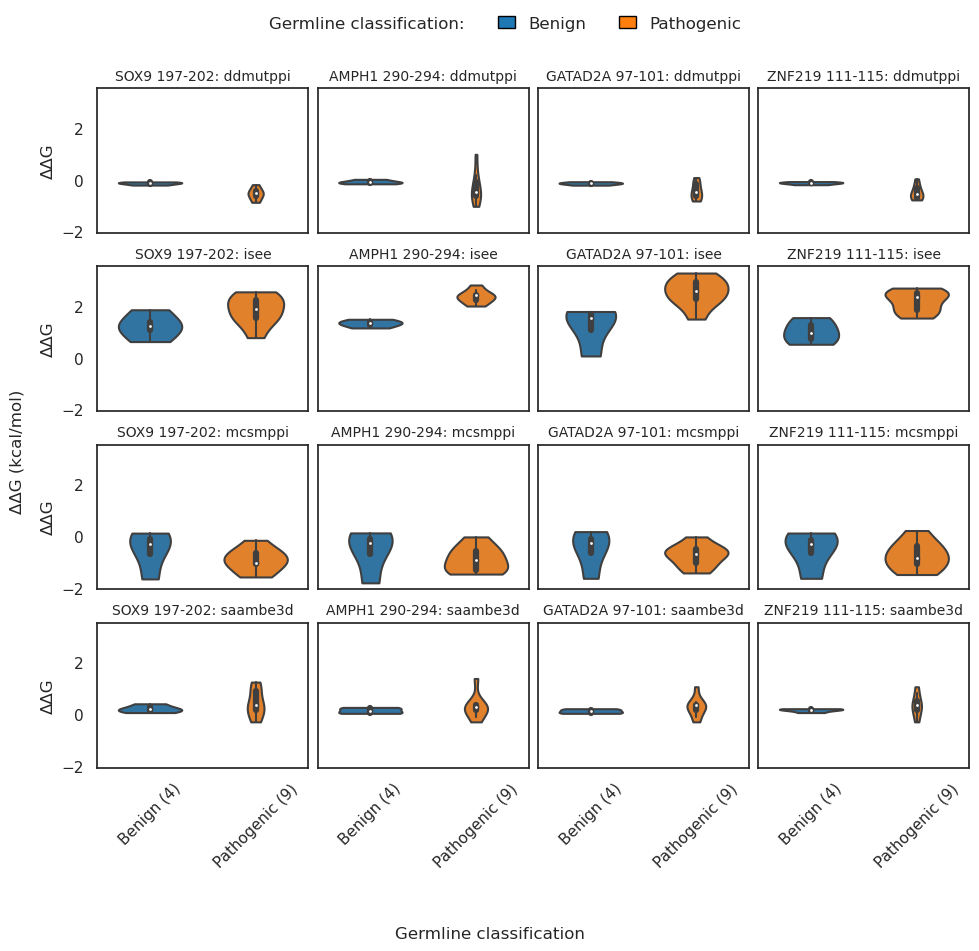

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from matplotlib.patches import Patch

# ——— Helper to add the Germline classification legend ———
def add_germline_legend(fig, palette, fontsize, y):
    header = Patch(facecolor='none', edgecolor='none',
                   label='Germline classification:')
    ben_handle  = Patch(facecolor=palette['Benign'], edgecolor='black',
                        label='Benign')
    path_handle = Patch(facecolor=palette['Pathogenic'], edgecolor='black',
                        label='Pathogenic')

    fig.legend(
        handles=[header, ben_handle, path_handle],
        labels=[h.get_label() for h in (header, ben_handle, path_handle)],
        loc='upper center',
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, y),
        fontsize=fontsize,
        handlelength=1
    )

# ——— Main plotting function ———
def plot_ddg_grid(df, targets,
                  title_sep=":",
                  fig_scale=2.5, fig_width=None, fig_height=None,
                  title_fontsize=10, label_fontsize=12, legend_fontsize=12,
                  h_pad=0.4, w_pad=0.4, bottom_margin=0.03, top_margin=0.90,
                  rotate_xticks=45,
                  save_path=None, dpi=300):
    # build x-axis labels with counts
    classes = ['Benign', 'Pathogenic']
    counts  = df['Germline classification'].value_counts()
    labels  = [f"{c} ({counts.get(c,0)})" for c in classes]

    # base palette
    base_palette = {'Benign': 'tab:blue', 'Pathogenic': 'tab:orange'}
    # map the count-labels to the two colors
    label_palette = {
        labels[0]: base_palette['Benign'],
        labels[1]: base_palette['Pathogenic']
    }

    df['Germline classification (count)'] = df['Germline classification']\
        .map(dict(zip(classes, labels)))

    # detect ddG columns of interest
    pat = re.compile(
        r'^(ddg_[^_]+_(?P<g>[^_]+)_(?P<m>[0-9\-]+)_str)_(?P<meth>.+)$'
    )
    partner_methods, all_methods = {}, set()
    for col in df.columns:
        m = pat.match(col)
        if not m:
            continue
        gene, motif, method = m.group('g'), m.group('m'), m.group('meth')
        prefix = m.group(1)
        if gene in targets and targets[gene] == motif:
            partner_methods.setdefault(prefix, {})[method] = col
            all_methods.add(method)

    # exclude foldx
    methods = sorted(m for m in all_methods if 'foldx' not in m.lower())
    partners = list(partner_methods.keys())

    # compute figure size
    n_rows, n_cols = len(methods), len(partners)
    fig_w = fig_width  or fig_scale * n_cols
    fig_h = fig_height or fig_scale * n_rows

    # styling
    plt.rcParams.update({'font.size': label_fontsize})
    sns.set_style("white")

    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(fig_w, fig_h),
                             sharex=True, sharey=True)

    for i, method in enumerate(methods):
        for j, prefix in enumerate(partners):
            ax = axes[i, j]
            col = partner_methods[prefix].get(method)
            if col is None:
                ax.axis('off')
                continue

            sub = (
                df[['Germline classification (count)', col]]
                  .dropna(subset=[col])
                  .rename(columns={col: 'ΔΔG'})
            )

            sns.violinplot(
                data=sub,
                x='Germline classification (count)',
                y='ΔΔG',
                order=labels,
                inner='box',
                cut=0,
                width=0.6,
                palette=label_palette,
                ax=ax
            )

            gene, motif = prefix.split('_')[2], prefix.split('_')[3]
            ax.set_title(f"{gene} {motif}{title_sep} {method}",
                         fontsize=title_fontsize)

            if j != 0:
                ax.set_ylabel('')
            if i != n_rows - 1:
                ax.set_xlabel('')
                ax.tick_params(axis='x', labelbottom=False)
            else:
                ax.set_xlabel('')
                ax.tick_params(axis='x', rotation=rotate_xticks)

    # shared axis labels
    fig.supylabel("ΔΔG (kcal/mol)", fontsize=label_fontsize)
    fig.supxlabel("Germline classification", fontsize=label_fontsize)

    # tighten before legend
    plt.tight_layout(h_pad=h_pad, w_pad=w_pad,
                     rect=[0, bottom_margin, 1, top_margin])

    # add legend
    add_germline_legend(fig, base_palette, legend_fontsize, y=top_margin + 0.05)

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        fig.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    plt.show()
    plt.close(fig)


# ——— Usage ———
if __name__ == "__main__":
    file_path   = "/project/ealexov/compbio/shamrat/250519_energy/04_binding/analysis/clinvar_1kgp_hector_gaf_final_binding.xlsx"
    output_path = "/project/ealexov/compbio/shamrat/250519_energy/04_binding/analysis/plots/ddg_binding_grid.png"

    df = pd.read_excel(file_path, sheet_name="Sheet1")
    df = df[df['position'].between(1, 302)]
    df = df[df['Germline classification'].isin(['Benign','Pathogenic'])]

    targets = {
        "SOX9":    "197-202",
        "AMPH1":   "290-294",
        "GATAD2A": "97-101",
        "ZNF219":  "111-115"
    }

    plot_ddg_grid(
        df, targets,
        title_sep=":",
        fig_scale=2.5,
        title_fontsize=10,
        label_fontsize=12,
        legend_fontsize=12,
        h_pad=0.4,
        w_pad=0.4,
        bottom_margin=0.03,
        top_margin=0.90,
        rotate_xticks=45,
        save_path=output_path,
        dpi=300
    )


Figure saved to: /project/ealexov/compbio/shamrat/250519_energy/04_binding/analysis/plots/ddg_binding_grid.png


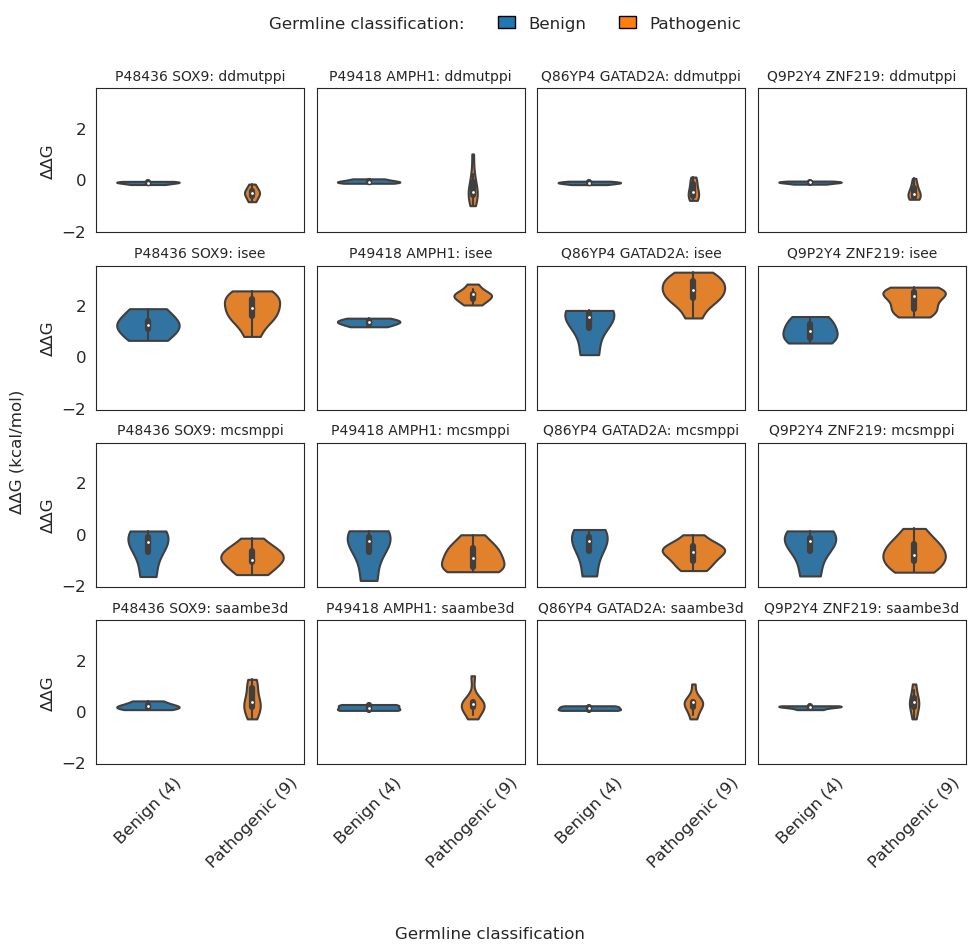

Numeric ΔΔG summary saved to: /project/ealexov/compbio/shamrat/250519_energy/04_binding/analysis/plots/ddg_violin_numeric_summary.xlsx


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from matplotlib.patches import Patch

# ——— Helper to add the Germline classification legend ———
def add_germline_legend(fig, palette, fontsize, y):
    header = Patch(facecolor='none', edgecolor='none',
                   label='Germline classification:')
    ben_handle  = Patch(facecolor=palette['Benign'], edgecolor='black',
                        label='Benign')
    path_handle = Patch(facecolor=palette['Pathogenic'], edgecolor='black',
                        label='Pathogenic')

    fig.legend(
        handles=[header, ben_handle, path_handle],
        labels=[h.get_label() for h in (header, ben_handle, path_handle)],
        loc='upper center',
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, y),
        fontsize=fontsize,
        handlelength=1
    )

# ——— Main plotting function ———
def plot_ddg_grid(df, targets,
                  title_sep=":",
                  fig_scale=2.5, fig_width=None, fig_height=None,
                  title_fontsize=10, label_fontsize=12, legend_fontsize=12,
                  h_pad=0.4, w_pad=0.4, bottom_margin=0.03, top_margin=0.90,
                  rotate_xticks=45,
                  save_path=None, dpi=300):
    # build x-axis labels with counts
    classes = ['Benign', 'Pathogenic']
    counts  = df['Germline classification'].value_counts()
    labels  = [f"{c} ({counts.get(c,0)})" for c in classes]

    # base palette
    base_palette = {'Benign': 'tab:blue', 'Pathogenic': 'tab:orange'}
    # map the count-labels to the two colors
    label_palette = {
        labels[0]: base_palette['Benign'],
        labels[1]: base_palette['Pathogenic']
    }

    df['Germline classification (count)'] = df['Germline classification']\
        .map(dict(zip(classes, labels)))

    # detect ddG columns of interest
    pat = re.compile(
        r'^(ddg_[^_]+_(?P<g>[^_]+)_(?P<m>[0-9\-]+)_(?P<mode>seq|str))_(?P<meth>.+)$'
    )
    partner_methods, all_methods = {}, set()
    for col in df.columns:
        m = pat.match(col)
        if not m:
            continue
        gene, motif, mode, method = m.group('g'), m.group('m'), m.group('mode'), m.group('meth')
        prefix = f"ddg_{m.group(1)}"
        if gene in targets and targets[gene] == motif:
            partner_methods.setdefault(prefix, {})[method] = col
            all_methods.add(method)

    # exclude foldx
    methods = sorted(m for m in all_methods if 'foldx' not in m.lower())
    partners = list(partner_methods.keys())

    # compute figure size
    n_rows, n_cols = len(methods), len(partners)
    fig_w = fig_width  or fig_scale * n_cols
    fig_h = fig_height or fig_scale * n_rows

    # styling
    plt.rcParams.update({'font.size': label_fontsize})
    sns.set_style("white")

    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(fig_w, fig_h),
                             sharex=True, sharey=True)

    for i, method in enumerate(methods):
        for j, prefix in enumerate(partners):
            ax = axes[i, j] if n_rows>1 and n_cols>1 else (axes[j] if n_rows==1 else axes[i])
            col = partner_methods[prefix].get(method)
            if col is None:
                ax.axis('off')
                continue

            sub = (
                df[['Germline classification (count)', col]]
                  .dropna(subset=[col])
                  .rename(columns={col: 'ΔΔG'})
            )

            sns.violinplot(
                data=sub,
                x='Germline classification (count)',
                y='ΔΔG',
                order=labels,
                inner='box',
                cut=0,
                width=0.6,
                palette=label_palette,
                ax=ax
            )

            gene, motif = prefix.split('_')[2], prefix.split('_')[3]
            ax.set_title(f"{gene} {motif}{title_sep} {method}",
                         fontsize=title_fontsize)

            if j != 0:
                ax.set_ylabel('')
            if i != n_rows - 1:
                ax.set_xlabel('')
                ax.tick_params(axis='x', labelbottom=False)
            else:
                ax.set_xlabel('')
                ax.tick_params(axis='x', rotation=rotate_xticks)

    # shared axis labels
    fig.supylabel("ΔΔG (kcal/mol)", fontsize=label_fontsize)
    fig.supxlabel("Germline classification", fontsize=label_fontsize)

    # tighten before legend
    plt.tight_layout(h_pad=h_pad, w_pad=w_pad,
                     rect=[0, bottom_margin, 1, top_margin])

    # add legend
    add_germline_legend(fig, base_palette, legend_fontsize, y=top_margin + 0.05)

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        fig.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    plt.show()
    plt.close(fig)

# ——— Usage ———
if __name__ == "__main__":
    base_dir   = "/project/ealexov/compbio/shamrat/250519_energy/04_binding/analysis"
    file_path  = os.path.join(base_dir, "clinvar_1kgp_hector_gaf_final_binding.xlsx")
    plot_path  = os.path.join(base_dir, "plots", "ddg_binding_grid.png")
    summary_xl = os.path.join(base_dir, "plots", "ddg_violin_numeric_summary.xlsx")

    # load & filter
    df = pd.read_excel(file_path, sheet_name="Sheet1")
    df = df[df['position'].between(1, 302)]
    df = df[df['Germline classification'].isin(['Benign','Pathogenic'])]

    targets = {
        "SOX9":    "197-202",
        "AMPH1":   "290-294",
        "GATAD2A": "97-101",
        "ZNF219":  "111-115"
    }

    # make plot
    plot_ddg_grid(
        df, targets,
        title_sep=":",
        fig_scale=2.5,
        title_fontsize=10,
        label_fontsize=12,
        legend_fontsize=12,
        h_pad=0.4,
        w_pad=0.4,
        bottom_margin=0.03,
        top_margin=0.90,
        rotate_xticks=45,
        save_path=plot_path,
        dpi=300
    )

    # numeric summary
    pat = re.compile(r'^ddg_[^_]+_([A-Za-z0-9]+)_([0-9\-]+)_(seq|str)_(.+)$')
    records = []
    for col in df.columns:
        m = pat.match(col)
        if not m:
            continue
        gene, motif, mode, method = m.groups()
        if 'foldx' in method.lower():
            continue
        sub = df[['Germline classification', col]].dropna()
        for cls in ['Benign', 'Pathogenic']:
            vals = sub.loc[sub['Germline classification'] == cls, col]
            records.append({
                'Gene': gene,
                'Motif': motif,
                'Mode': mode,
                'Method': method,
                'Class': cls,
                'n': len(vals),
                'mean': vals.mean(),
                'median': vals.median(),
                'std': vals.std()
            })

    summary_df = pd.DataFrame(records)
    os.makedirs(os.path.dirname(summary_xl), exist_ok=True)
    summary_df.to_excel(summary_xl, index=False)
    print(f"Numeric ΔΔG summary saved to: {summary_xl}")
